## Carolina Across 100 Hackathon

#### Importing the dataset.

In [2]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/vital-statistics-and-health-linc.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
csv_reader = pd.read_csv(DATA_FILE_PATH, encoding='utf8')
df = pd.DataFrame(csv_reader)
df.tail()

,Area Name,Area Type,Year,Variable,Value
105009,Madison County,County,2022,Beds in General Hospitals,0
105010,Martin County,County,2022,Beds in General Hospitals,49
105011,Nash County,County,2022,Beds in General Hospitals,312
105012,Scotland County,County,2022,Beds in General Hospitals,97
105013,Wilkes County,County,2022,Beds in General Hospitals,120


In [4]:
csv_reader.Variable.unique()

array(['Marriages', 'Low-Weight Births Under 2500 Grams',
       'Persons Served in State Mental Hlth Development Centers',
       'Pregnancies for Females of All Ages',
       'Pregnancies for Females 15-19', 'Reported Abortions',
       'Persons Served in Area Mental Health Programs',
       'Persons Served in State Psychiatric Hospitals',
       'Nursing Facility Beds', 'Blind and Visually Impaired Persons',
       'General Hospital Discharges', 'Infant Deaths',
       'Nongeriatric Deaths', 'Deaths by Injury or Violence',
       'Resident Deaths',
       'Persons Served in NC Alcohol and Drug Treatment Centers',
       'Divorces', 'Beds in General Hospitals', 'Resident Live Births',
       'Registered Nurses', 'Midlevel Practitioners', 'Active Dentists',
       'Active Primary Care Physicians',
       'Total Active Physicians, Nonfederal, Non-resident-in-tr',
       'Persons Age 16-64 with Work Disability',
       'Persons with Transportation Disability'], dtype=object)

In [5]:
mental_health: list[str] = [
    'Persons Served in State Mental Hlth Development Centers',
    'Persons Served in Area Mental Health Programs',
    'Persons Served in State Psychiatric Hospitals',
    'Persons Served in NC Alcohol and Drug Treatment Centers',
]

df_state_mental_health = df.loc[df['Variable'] == 'Persons Served in State Mental Hlth Development Centers'].sort_values('Year')
df_area_mental_health = df.loc[df['Variable'] == 'Persons Served in Area Mental Health Programs'].sort_values('Year')
df_state_psy_hospitals = df.loc[df['Variable'] == 'Persons Served in State Psychiatric Hospitals'].sort_values('Year')

In [6]:
df2 = pd.DataFrame()
Years = []
state_mental_health = []
area_mental_health = []
psy_hospitals = []

for year in range(1980, 2017):
    Years.append(year)
    state_mental_health.append(df_state_mental_health.loc[df['Year'] == year, 'Value'].sum())

for year in range(1980, 2017):
    area_mental_health.append(df_area_mental_health.loc[df['Year'] == year, 'Value'].sum())

for year in range(1980, 2017):
    psy_hospitals.append(df_state_psy_hospitals.loc[df['Year'] == year, 'Value'].sum())

df2['Year'] = Years
df2['Persons Serving in State Mental Health Development Centers'] = state_mental_health
df2['Persons Serving in Area Mental Health Programs'] = area_mental_health
df2['Persons Served in State Psychiatric Hospitals'] = psy_hospitals

Therefore, over the span of the last 30 years, we notice a general downward trend in the number of persons serving in State Mental Health Development Centers across North Carolina which could have led to us being ill-equipped to combat the rampant mental illnesses because of COVID-19.

Text(0, 0.5, 'Persons Served in State Mental Health Centers')

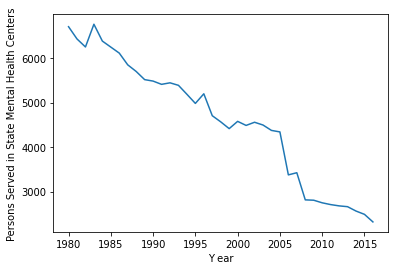

In [16]:
plt.plot(df2['Year'], df2['Persons Serving in State Mental Health Development Centers'], label = "line 1")
plt.xlabel('Y ear')
plt.ylabel('Persons Served in State Mental Health Centers')

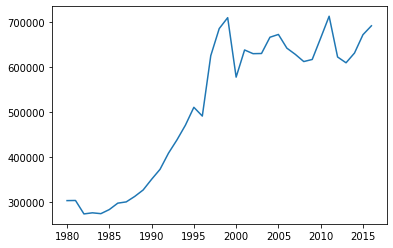

In [8]:
plt.plot(df2['Year'], df2['Persons Serving in Area Mental Health Programs'], label = "line 2")

Text(0, 0.5, 'People Served in State Psychiatric Hospitals')

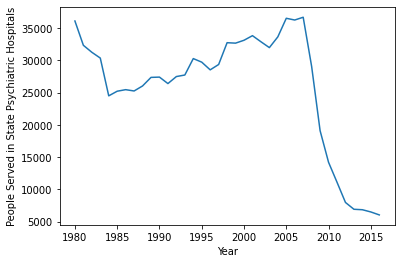

In [14]:
plt.plot(df2['Year'], df2['Persons Served in State Psychiatric Hospitals'], label = "line 3")
plt.xlabel("Year")
plt.ylabel("People Served in State Psychiatric Hospitals")

In [10]:
df_area_mental_health

,Area Name,Area Type,Year,Variable,Value
61661,Orange County,County,1980,Persons Served in Area Mental Health Programs,1366
61894,Pitt County,County,1980,Persons Served in Area Mental Health Programs,2695
98697,Catawba County,County,1980,Persons Served in Area Mental Health Programs,2907
8951,Gates County,County,1980,Persons Served in Area Mental Health Programs,306
9049,Halifax County,County,1980,Persons Served in Area Mental Health Programs,1554
...,...,...,...,...,...
85833,Stanly County,County,2020,Persons Served in Area Mental Health Programs,2011
85834,Swain County,County,2020,Persons Served in Area Mental Health Programs,835
85835,Tyrrell County,County,2020,Persons Served in Area Mental Health Programs,116
85829,Hertford County,County,2020,Persons Served in Area Mental Health Programs,742


In [11]:
df_state_mental_health

,Area Name,Area Type,Year,Variable,Value
47022,Wake County,County,1980,Persons Served in State Mental Hlth Developmen...,86
37797,Cherokee County,County,1980,Persons Served in State Mental Hlth Developmen...,8
37802,Catawba County,County,1980,Persons Served in State Mental Hlth Developmen...,41
38562,Iredell County,County,1980,Persons Served in State Mental Hlth Developmen...,40
81255,Lee County,County,1980,Persons Served in State Mental Hlth Developmen...,20
...,...,...,...,...,...
3453,Stanly County,County,2016,Persons Served in State Mental Hlth Developmen...,3
3454,Swain County,County,2016,Persons Served in State Mental Hlth Developmen...,0
3455,Washington County,County,2016,Persons Served in State Mental Hlth Developmen...,1
55177,Pitt County,County,2016,Persons Served in State Mental Hlth Developmen...,30


In [12]:
df_state_psy_hospitals

,Area Name,Area Type,Year,Variable,Value
78999,North Carolina,State of NC,1980,Persons Served in State Psychiatric Hospitals,18114
25187,Caldwell County,County,1980,Persons Served in State Psychiatric Hospitals,255
74697,Scotland County,County,1980,Persons Served in State Psychiatric Hospitals,16
22308,Iredell County,County,1980,Persons Served in State Psychiatric Hospitals,341
25463,Carteret County,County,1980,Persons Served in State Psychiatric Hospitals,133
...,...,...,...,...,...
63223,Surry County,County,2017,Persons Served in State Psychiatric Hospitals,11
45585,Cumberland County,County,2017,Persons Served in State Psychiatric Hospitals,149
45584,Craven County,County,2017,Persons Served in State Psychiatric Hospitals,17
45587,Granville County,County,2017,Persons Served in State Psychiatric Hospitals,44


## CONCLUSION:

NOT ADEQUATELY PREPARED TO COMBAT THE MENTAL HEALTH WAVE THAT WAS BROUGHT ABOUT BY THE COVID-19 PANDEMIC.

### How to be better prepared for next time?

Invest in mental health resources and facilities. State should improve resources spent in the field to be better equipped to help the people who need it the most.

Also possibly include a pie chart that includes the percentage of funding for mental health v/s all healthcare funding in North Carolina. Might be interesting...